# **Simple Linear Regression**

In [ ]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
# Step 1: Create sample dataset (Hours studied vs Exam Score)
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Exam_Score':    [50, 55, 62, 68, 75, 80, 84, 88, 91, 94, 96, 98]
}

In [ ]:
df = pd.DataFrame(data)
print("Dataset (Hours Studied vs Exam Score):")
print(df)
print()

Dataset (Hours Studied vs Exam Score):
    Hours_Studied  Exam_Score
0               1          50
1               2          55
2               3          62
3               4          68
4               5          75
5               6          80
6               7          84
7               8          88
8               9          91
9              10          94
10             11          96
11             12          98



In [ ]:
# Step 2: Prepare features (X) and target (y)
X = df[['Hours_Studied']]   # 2D structure (DataFrame) - required by sklearn
y = df['Exam_Score']        # 1D structure (Series)

In [ ]:
# Step 3: Split data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% for testing
    random_state=42         # same split every time
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples:  {len(X_test)}")
print()

Training samples: 9
Testing samples:  3



In [ ]:
# Step 4: Create and train the model (only on training data!)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 5: Show the learned regression equation
b0 = model.intercept_   # y-intercept
b1 = model.coef_[0]     # slope

print("Learned Regression Line:")
print(f"Exam_Score = {b0:.2f} + {b1:.2f} × Hours_Studied")
print()

Learned Regression Line:
Exam_Score = 50.65 + 4.38 × Hours_Studied



In [ ]:
# Step 6: Make predictions on test data (unseen data)
y_test_pred = model.predict(X_test)

# Calculate metrics on the TEST set
mae   = mean_absolute_error(y_test, y_test_pred)
mse   = mean_squared_error(y_test, y_test_pred)
rmse  = np.sqrt(mse)
r2    = r2_score(y_test, y_test_pred)

print("┌─────────────────────────────────────────────────────────┐")
print("│ PERFORMANCE METRICS - SIMPLE LINEAR REGRESSION          │")
print("├─────────────────────────────────────────────────────────┤")
print(f"│ MAE  (Mean Absolute Error)     : {mae:>10.2f}             │")
print(f"│ MSE  (Mean Squared Error)      : {mse:>10.2f}             │")
print(f"│ RMSE (Root Mean Squared Error) : {rmse:>10.2f}             │")
print(f"│ R² Score                       : {r2:>10.4f} ({r2*100:>5.1f}%)    │")
print("└─────────────────────────────────────────────────────────┘")
print()

┌─────────────────────────────────────────────────────────┐
│ PERFORMANCE METRICS - SIMPLE LINEAR REGRESSION          │
├─────────────────────────────────────────────────────────┤
│ MAE  (Mean Absolute Error)     :       2.75             │
│ MSE  (Mean Squared Error)      :      11.11             │
│ RMSE (Root Mean Squared Error) :       3.33             │
│ R² Score                       :     0.9753 ( 97.5%)    │
└─────────────────────────────────────────────────────────┘



In [ ]:
# Interpretation
print("Quick Interpretation:")
print(f"- MAE = {mae:.2f} → On average, predictions are off by {mae:.1f} marks")
print(f"- RMSE = {rmse:.2f} → Similar to MAE but penalizes larger errors more")
print(f"- R² = {r2:.4f} → Model explains {r2*100:.1f}% of the variation in scores")

Quick Interpretation:
- MAE = 2.75 → On average, predictions are off by 2.8 marks
- RMSE = 3.33 → Similar to MAE but penalizes larger errors more
- R² = 0.9753 → Model explains 97.5% of the variation in scores


In [ ]:
# Show actual vs predicted for test students
print("Test Set - Actual vs Predicted:")
test_results = pd.DataFrame({
    'Hours': X_test['Hours_Studied'],
    'Actual Score': y_test,
    'Predicted Score': y_test_pred.round(1)
})
print(test_results.sort_values('Hours'))
print()

Test Set - Actual vs Predicted:
    Hours  Actual Score  Predicted Score
0       1            50             55.0
9      10            94             94.4
10     11            96             98.8



In [ ]:
# Step 7: Make a prediction for a new student
new_student_hours = 7.5
predicted_score = model.predict([[new_student_hours]])[0]

print(f"New student studied {new_student_hours} hours → Predicted score: {predicted_score:.1f}")
print()

New student studied 7.5 hours → Predicted score: 83.5



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


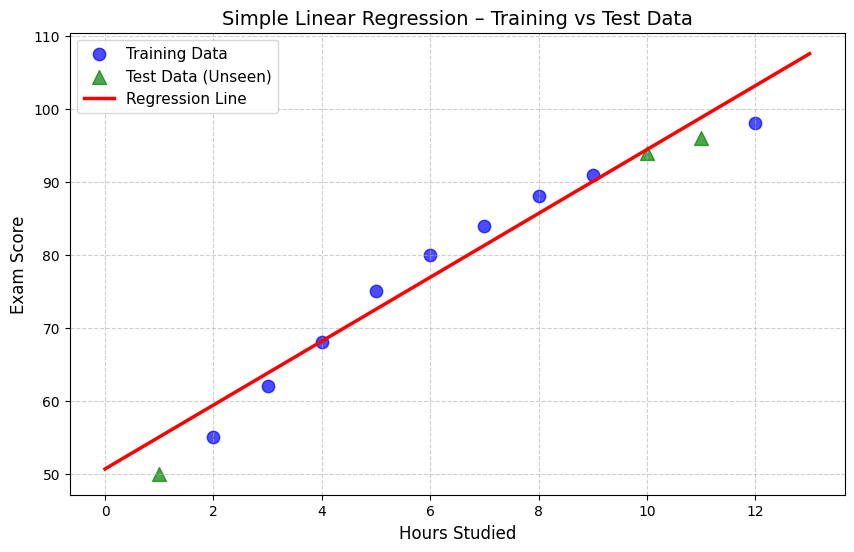

In [ ]:
# Step 8: Visualize everything
plt.figure(figsize=(10, 6))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7, s=80)

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data (Unseen)', alpha=0.7, s=100, marker='^')

# Plot the regression line
X_line = pd.DataFrame({'Hours_Studied': range(0, 14)})
y_line = model.predict(X_line)
plt.plot(X_line, y_line, color='red', linewidth=2.5, label='Regression Line')

plt.xlabel('Hours Studied', fontsize=12)
plt.ylabel('Exam Score', fontsize=12)
plt.title('Simple Linear Regression – Training vs Test Data', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **Multiple Linear regression**

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Create sample dataset
# Predicting House Price (in $1000s) based on:
# - Size (sq ft)
# - Number of Bedrooms
# - Number of Bathrooms

data = {
    'Size_sqft':    [1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000, 3200],
    'Bedrooms':     [2,     2,     3,     3,     4,     4,     4,     5,     5,     5],
    'Bathrooms':    [1,     1.5,   2,     2,     2.5,   3,     3,     3.5,   4,     4],
    'Price_1000s':  [200,   240,   300,   350,   400,   450,   520,   580,   620,   680]
}

df = pd.DataFrame(data)
print("House Price Dataset:")
print(df)
print()

House Price Dataset:
   Size_sqft  Bedrooms  Bathrooms  Price_1000s
0       1000         2        1.0          200
1       1200         2        1.5          240
2       1500         3        2.0          300
3       1800         3        2.0          350
4       2000         4        2.5          400
5       2200         4        3.0          450
6       2500         4        3.0          520
7       2800         5        3.5          580
8       3000         5        4.0          620
9       3200         5        4.0          680



In [ ]:
# Step 2: Prepare features (X) and target (y)
X = df[['Size_sqft', 'Bedrooms', 'Bathrooms']]   # Multiple features
y = df['Price_1000s']                            # Target variable

In [ ]:
# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 30% for testing (small dataset)
    random_state=42         # reproducible split
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples:  {len(X_test)}")
print()

Training samples: 7
Testing samples:  3



In [ ]:
# Step 4: Create and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Step 5: Show the learned regression equation
intercept = model.intercept_
coefficients = model.coef_

print("Multiple Linear Regression Equation:")
print(f"Price ($1000s) = {intercept:.2f}")
print(f"          + {coefficients[0]:.2f} × Size_sqft")
print(f"          + {coefficients[1]:.2f} × Bedrooms")
print(f"          + {coefficients[2]:.2f} × Bathrooms")
print()

Multiple Linear Regression Equation:
Price ($1000s) = -9.50
          + 0.20 × Size_sqft
          + -18.75 × Bedrooms
          + 33.13 × Bathrooms



In [ ]:
# Step 6: Make predictions on the test set
y_test_pred = model.predict(X_test)
# Calculate metrics on the TEST set
mae   = mean_absolute_error(y_test, y_test_pred)
mse   = mean_squared_error(y_test, y_test_pred)
rmse  = np.sqrt(mse)
r2    = r2_score(y_test, y_test_pred)

print("\n" + "="*60)
print("PERFORMANCE METRICS - MULTIPLE LINEAR REGRESSION")
print("="*60)
print(f"MAE   (Mean Absolute Error)     : {mae:>10.2f} ($1000s)")
print(f"MSE   (Mean Squared Error)      : {mse:>10.2f}")
print(f"RMSE  (Root Mean Squared Error) : {rmse:>10.2f} ($1000s)")
print(f"R²    Score                      : {r2:>10.4f}  ({r2*100:>5.1f}% variance explained)")
print("="*60)
print()





PERFORMANCE METRICS - MULTIPLE LINEAR REGRESSION
MAE   (Mean Absolute Error)     :       9.60 ($1000s)
MSE   (Mean Squared Error)      :     108.88
RMSE  (Root Mean Squared Error) :      10.43 ($1000s)
R²    Score                      :     0.9955  ( 99.5% variance explained)



In [ ]:
# Quick interpretation
print("Interpretation:")
print(f"- MAE = {mae:.2f} → Average prediction error is about ${mae:.1f}k")
print(f"- RMSE = {rmse:.2f} → Similar to MAE, but penalizes larger errors more")
print(f"- R² = {r2:.4f} → Model explains {r2*100:.1f}% of the variation in house prices")
print()


Interpretation:
- MAE = 9.60 → Average prediction error is about $9.6k
- RMSE = 10.43 → Similar to MAE, but penalizes larger errors more
- R² = 0.9955 → Model explains 99.5% of the variation in house prices



In [ ]:
# Show actual vs predicted for test houses
print("Test Set - Actual vs Predicted Prices:")
test_results = pd.DataFrame({
    'Size_sqft': X_test['Size_sqft'],
    'Bedrooms':  X_test['Bedrooms'],
    'Bathrooms': X_test['Bathrooms'],
    'Actual_Price': y_test,
    'Predicted_Price': y_test_pred.round(1)
})
print(test_results.sort_values('Size_sqft'))
print()

Test Set - Actual vs Predicted Prices:
   Size_sqft  Bedrooms  Bathrooms  Actual_Price  Predicted_Price
1       1200         2        1.5           240            244.9
5       2200         4        3.0           450            459.0
8       3000         5        4.0           620            634.9



In [ ]:
# Step 7: Predict price for a new house
new_house = pd.DataFrame({
    'Size_sqft': [2400],
    'Bedrooms':  [4],
    'Bathrooms': [3]
})

predicted_price = model.predict(new_house)[0]
print(f"New house: 2400 sqft, 4 bedrooms, 3 bathrooms")
print(f"→ Predicted price: ${predicted_price:.1f}k")
print()

New house: 2400 sqft, 4 bedrooms, 3 bathrooms
→ Predicted price: $499.4k



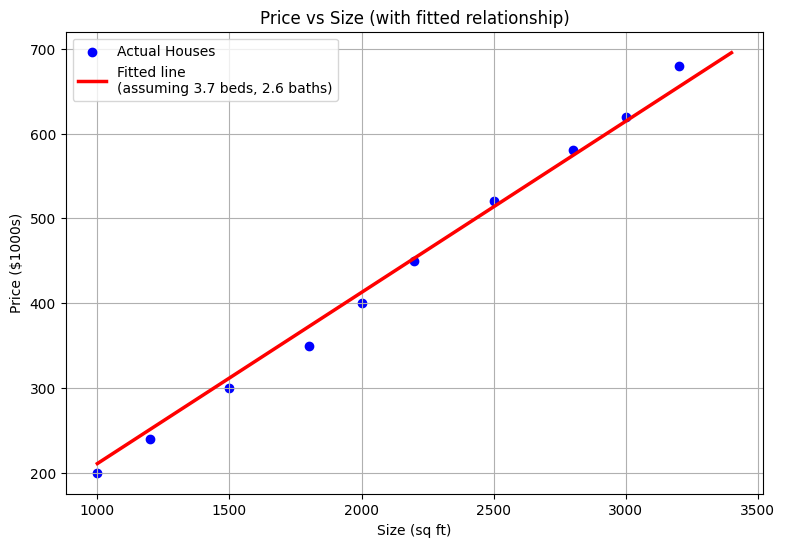

In [ ]:
# Create range of sizes, keep other features at mean value
mean_bed = df['Bedrooms'].mean()
mean_bath = df['Bathrooms'].mean()

size_range = pd.DataFrame({
    'Size_sqft': range(1000, 3500, 200),
    'Bedrooms':  [mean_bed] * 13,
    'Bathrooms': [mean_bath] * 13
})

predicted_vs_size = model.predict(size_range)

plt.figure(figsize=(9, 6))
plt.scatter(df['Size_sqft'], df['Price_1000s'], color='blue', label='Actual Houses')
plt.plot(size_range['Size_sqft'], predicted_vs_size, color='red', linewidth=2.5,
         label=f'Fitted line\n(assuming {mean_bed:.1f} beds, {mean_bath:.1f} baths)')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('Price vs Size (with fitted relationship)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate and print performance metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Performance Metrics for Simple Linear Regression:")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"MSE (Mean Squared Error): {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")
print()

Performance Metrics for Simple Linear Regression:
MAE (Mean Absolute Error): 9.60
MSE (Mean Squared Error): 108.88
RMSE (Root Mean Squared Error): 10.43
R² Score: 0.9955



# **Polynomial Regression**

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# Step 1: Create sample dataset
# Example: Plant height (cm) over weeks — shows non-linear (curved) growth
data = {
    'Week':     [1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
    'Height_cm': [5, 12, 22, 35, 48, 60, 70, 78, 84, 88]
}

df = pd.DataFrame(data)
print("Plant Growth Dataset (non-linear pattern):")
print(df)
print()

Plant Growth Dataset (non-linear pattern):
   Week  Height_cm
0     1          5
1     2         12
2     3         22
3     4         35
4     5         48
5     6         60
6     7         70
7     8         78
8     9         84
9    10         88



In [ ]:
# Step 2: Prepare features (X) and target (y)
X = df[['Week']]          # input feature (only one for this example)
y = df['Height_cm']       # target

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 30% for testing
    random_state=42
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples:  {len(X_test)}")
print()

Training samples: 7
Testing samples:  3



In [ ]:
# Step 4: Create Polynomial Features (we'll use degree 2 = quadratic)
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

# Transform training and test data to include x² terms
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

In [ ]:
# Step 5: Train a Linear Regression model on the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Step 6: Show the polynomial equation (manually constructed)
coefficients = model.coef_
intercept = model.intercept_

print(f"Polynomial Regression Equation (degree {degree}):")
print(f"Height = {intercept:.2f}")
for i, coef in enumerate(coefficients, 1):
    print(f"      + {coef:.2f} × Week^{i}")
print()

Polynomial Regression Equation (degree 2):
Height = -10.99
      + 13.34 × Week^1
      + -0.32 × Week^2



In [ ]:
# Step 7: Make predictions on test set
y_test_pred = model.predict(X_test_poly)
#Performance Metrices
mae   = mean_absolute_error(y_test, y_test_pred)
mse   = mean_squared_error(y_test, y_test_pred)
rmse  = np.sqrt(mse)
r2    = r2_score(y_test, y_test_pred)

print("\n" + "="*60)
print(f"PERFORMANCE METRICS - POLYNOMIAL REGRESSION (degree {degree})")
print("="*60)
print(f"MAE   (Mean Absolute Error)     : {mae:>10.2f} cm")
print(f"MSE   (Mean Squared Error)      : {mse:>10.2f}")
print(f"RMSE  (Root Mean Squared Error) : {rmse:>10.2f} cm")
print(f"R²    Score                      : {r2:>10.4f}  ({r2*100:>5.1f}% variance explained)")
print("="*60)
print()


PERFORMANCE METRICS - POLYNOMIAL REGRESSION (degree 2)
MAE   (Mean Absolute Error)     :       1.84 cm
MSE   (Mean Squared Error)      :       4.03
RMSE  (Root Mean Squared Error) :       2.01 cm
R²    Score                      :     0.9955  ( 99.6% variance explained)



In [ ]:
# Quick interpretation
print("Interpretation:")
print(f"- MAE = {mae:.2f} → Average prediction error is about {mae:.1f} cm")
print(f"- RMSE = {rmse:.2f} → Similar to MAE but penalizes larger errors more")
print(f"- R² = {r2:.4f} → Model explains {r2*100:.1f}% of the variation in plant height")
print()

Interpretation:
- MAE = 1.84 → Average prediction error is about 1.8 cm
- RMSE = 2.01 → Similar to MAE but penalizes larger errors more
- R² = 0.9955 → Model explains 99.6% of the variation in plant height



In [ ]:
# Show actual vs predicted
print("Test Set - Actual vs Predicted Height:")
test_results = pd.DataFrame({
    'Week': X_test['Week'].values.flatten(),
    'Actual_Height': y_test,
    'Predicted_Height': y_test_pred.round(1)
})
print(test_results.sort_values('Week'))
print()

Test Set - Actual vs Predicted Height:
   Week  Actual_Height  Predicted_Height
1     2             12              14.4
5     6             60              57.6
8     9             84              83.3



In [ ]:
# Step 8: Predict for a new week
new_week = 11
new_week_poly = poly.transform([[new_week]])
predicted_height = model.predict(new_week_poly)[0]

print(f"Prediction for week {new_week}: {predicted_height:.1f} cm")
print()

Prediction for week 11: 97.3 cm



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


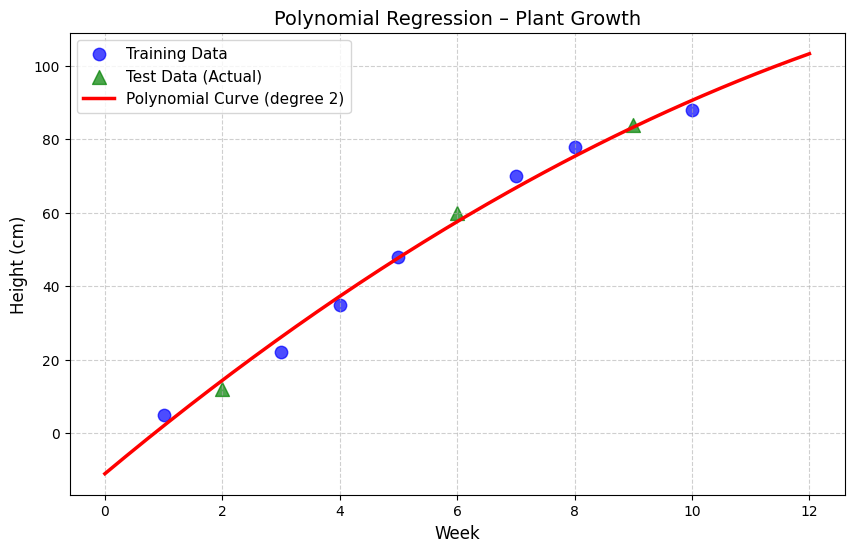

In [ ]:
# Step 9: Visualization - smooth curve
plt.figure(figsize=(10, 6))

# Training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', s=80, alpha=0.7)

# Test data (actual)
plt.scatter(X_test, y_test, color='green', label='Test Data (Actual)', s=100, marker='^', alpha=0.7)

# Smooth curve for the whole range
X_curve = np.linspace(0, 12, 200).reshape(-1, 1)   # many points for smooth line
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red', linewidth=2.5, label=f'Polynomial Curve (degree {degree})')

plt.xlabel('Week', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.title('Polynomial Regression – Plant Growth', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()